In [3]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pickle
import glob

In [7]:
size = 0
types = [["NuECC", 0],["NuENC", 1],["NuMuCC", 2],["NuMuNC", 3],["NuTauCC", 4],["NuTauNC", 5]]
for t in types:
    for name in glob.glob('/home/dup193/work/double_pulse/data/Nu_all/'+t[0]+'*_info.pkl'):
        x = np.load(name, mmap_mode="r",allow_pickle=True)
        print(name, len(x), t[1])
        size = size +len(x)
print(size)

/home/dup193/work/double_pulse/data/Nu_all/NuECC_Qtot2000_Qst600_1_000001_info.pkl 23860 0
/home/dup193/work/double_pulse/data/Nu_all/NuECC_Qtot2000_Qst600_9_000084_info.pkl 23624 0
/home/dup193/work/double_pulse/data/Nu_all/NuECC_Qtot2000_Qst600_1_000002_info.pkl 23986 0
/home/dup193/work/double_pulse/data/Nu_all/NuECC_Qtot2000_Qst600_11_000100_info.pkl 24477 0
/home/dup193/work/double_pulse/data/Nu_all/NuECC_Qtot2000_Qst600_4_000038_info.pkl 23958 0
/home/dup193/work/double_pulse/data/Nu_all/NuECC_Qtot2000_Qst600_7_000065_info.pkl 24005 0
/home/dup193/work/double_pulse/data/Nu_all/NuECC_Qtot2000_Qst600_9_000085_info.pkl 23814 0
/home/dup193/work/double_pulse/data/Nu_all/NuECC_Qtot2000_Qst600_12_000110_info.pkl 24024 0
/home/dup193/work/double_pulse/data/Nu_all/NuECC_Qtot2000_Qst600_8_000077_info.pkl 24001 0
/home/dup193/work/double_pulse/data/Nu_all/NuECC_Qtot2000_Qst600_7_000068_info.pkl 24038 0
/home/dup193/work/double_pulse/data/Nu_all/NuECC_Qtot2000_Qst600_10_000092_info.pkl 2389

In [4]:
def GetEnergy(en_arr,ptype):
    for name in glob.glob('/home/dup193/work/double_pulse/data/Nu_all/'+ptype+'*_info.pkl'):
        data = np.load(name, mmap_mode="r", allow_pickle=True)
        for i in data:
            en = i['tau_energy']
            en_arr.append(en)
    return   

In [25]:
def Plot(arr1, name, bs =100, r = [1000,100000], lab = "Energy, GeV"):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111)
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    #weights1 = np.ones_like(arr1)/float(len(arr1))
    ax.set_xscale('log')
    #ax.set_yscale('log')
    ax.set_title(name, fontsize = 14)
    ax.text(0.5,0.95,'#Events '+str(len(arr1)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.set_xlabel(lab, fontsize = 14)                                                              
    ax.set_ylabel("FractionEvents", fontsize = 14)                                                   
    ax.hist(arr1, bins =bs, range = r, histtype = 'step',edgecolor ='r', fill= False,)  

In [6]:
en_e_cc = []
GetEnergy(en_e_cc,"NuECC")
print(len(en_e_cc))
en_e_cc = np.array(en_e_cc)

2885285


In [7]:
en_e_nc = []
GetEnergy(en_e_nc,"NuENC")
print(len(en_e_nc))
en_e_nc = np.array(en_e_nc)

441544


In [8]:
en_m_cc = []
GetEnergy(en_m_cc,"NuMuCC")
print(len(en_m_cc))
en_m_cc = np.array(en_m_cc)

2960557


In [9]:
en_m_nc = []
GetEnergy(en_m_nc,"NuMuNC")
print(len(en_m_nc))
en_m_nc = np.array(en_m_nc)

370980


In [10]:
en_t_cc = []
GetEnergy(en_t_cc,"NuTauCC")
print(len(en_t_cc))
en_t_cc = np.array(en_t_cc)

909096


In [11]:
en_t_nc = []
GetEnergy(en_t_nc,"NuTauNC")
print(len(en_t_nc))
en_t_nc = np.array(en_t_nc)

170116


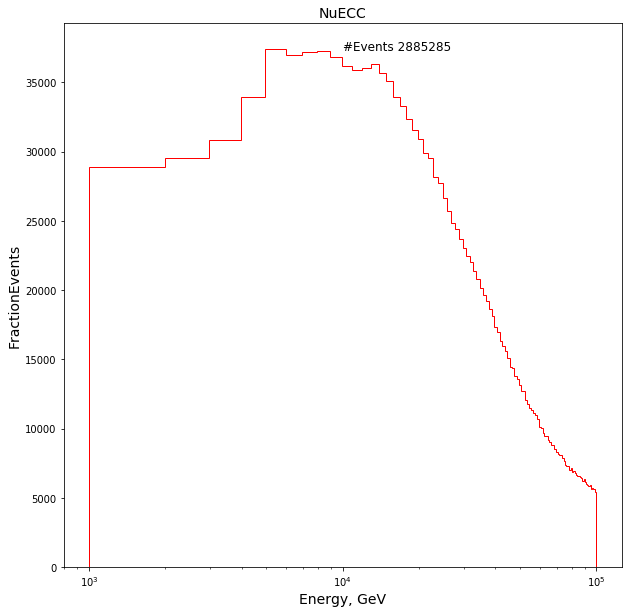

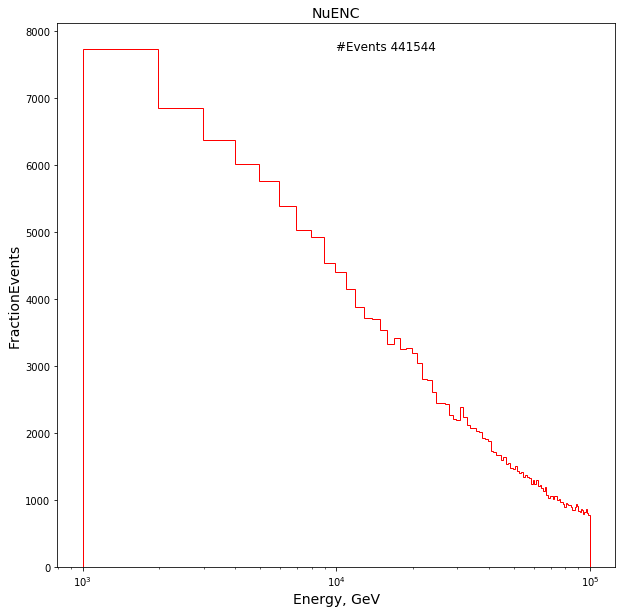

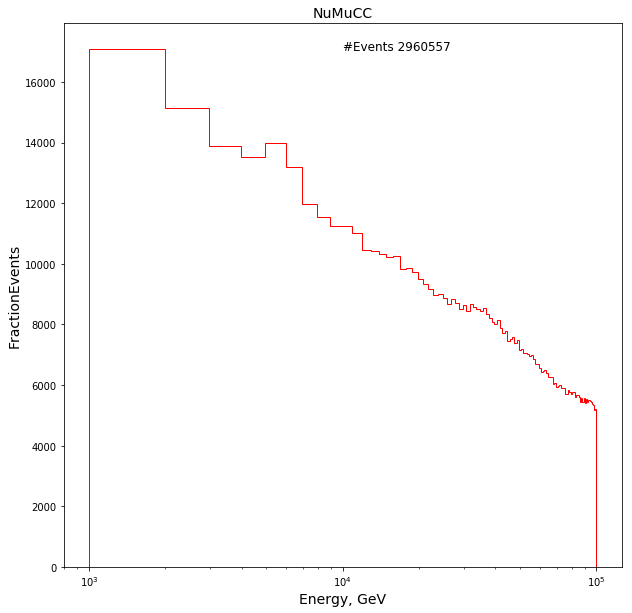

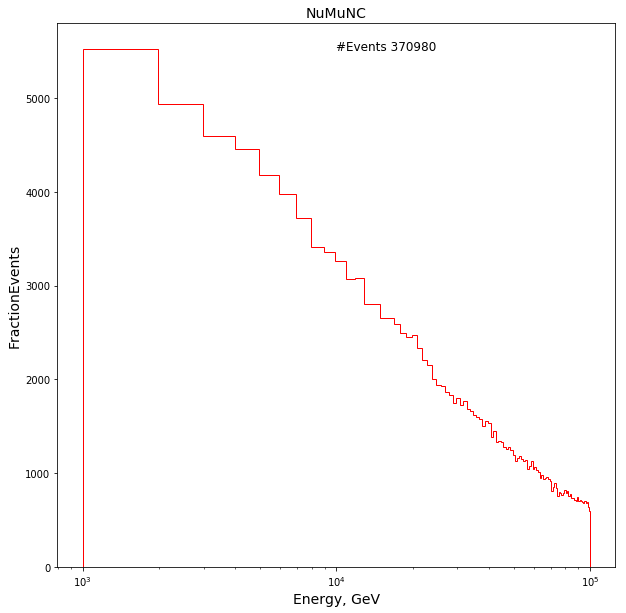

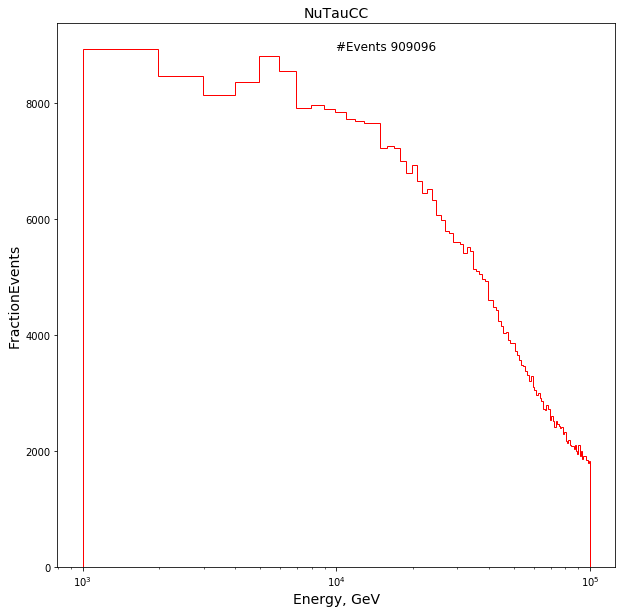

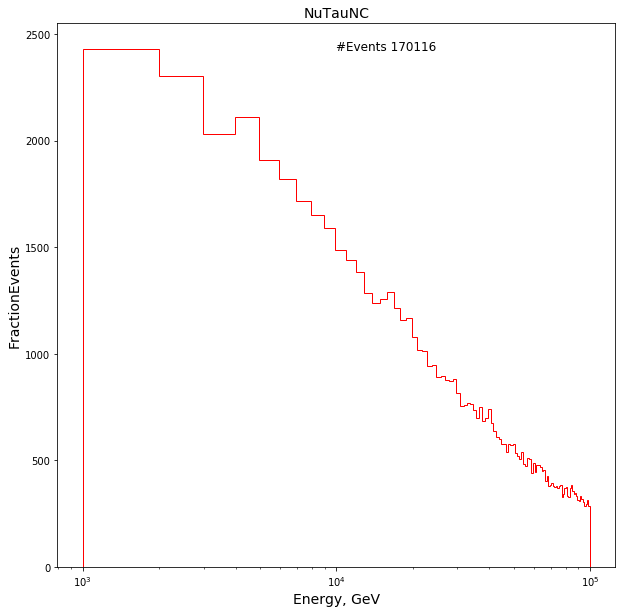

In [26]:
Plot(en_e_cc, 'NuECC')
Plot(en_e_nc, 'NuENC')
Plot(en_m_cc, 'NuMuCC')
Plot(en_m_nc, 'NuMuNC')
Plot(en_t_cc, 'NuTauCC')
Plot(en_t_nc, 'NuTauNC')

In [ ]:
pos = 0
nu_data = np.memmap('/fastio2/dasha/double_pulse/nu_data.npy', mode = 'w+', dtype ='float32', shape=(size,300,60))
nu_label = np.memmap('/fastio2/dasha/double_pulse/nu_label.npy', mode = 'w+', dtype ='float32', shape=size)
nu_files = []

types = [["NuECC", 0],["NuENC", 1],["NuMuCC", 2],["NuMuNC", 3],["NuTauCC", 4],["NuTauNC", 5]]
for t in types:
    for name in glob.glob('/home/dup193/work/double_pulse/data/Nu_all/'+t[0]+'*_data.npy'):
        data = np.load(name, mmap_mode="r")
    
        file_name = name[43:-9]
        h,w,d = data.shape
        label = t[1]
        nu_files.append([file_name,pos])
        print(file_name, data.shape, label, pos)
    
        data = np.float32(data)
        nu_data[pos:pos+h] = data
        nu_label[pos:pos+h] = np.full(shape=h,fill_value=label,dtype=np.int)
        pos = pos + h

np.save('/fastio2/dasha/double_pulse/nu_files.npy',nu_files)
print(len(nu_files))